No ficheiro de dados econ.xlsx encontra informação relativa a dados económicos dos Estados Unidos providenciados pela empresa [FRED](https://fred.stlouisfed.org/). Este conjunto de dados possui as seguintes variáveis: tempo (Data do registo); gcp (gastos de consumo pessoal, em biliões de dólares); pop (população total); tpp (taxa de poupança pessoal); ddesemp (duração mediana do desemprego, em semanas); ndesemp (número de desempregados, em milhares).

Considere as variáveis $X_1=ddesemp$ e $X_2=gcp$ para os anos superiores ou iguais a 1974. Com recurso ao pacote $ggplot$ produza um único gráfico que lhe permita fazer uma análise da evolução dessas duas variáveis para esses anos.

Uma vez que as variáveis podem não ter a mesma escala, antes de construir o gráfico proceda do seguinte modo:

- Selecione os dados a usar.
- Faça a seguinte transformação aos dados associados a cada variável $$ X_k : z_{ik} = \frac{x_{ik} − \overline{x}_{k}}{sx_k},i=1,2,…,n, $$

onde $n$ é a dimensão da amostra, $\overline{x}_k$ e $sx_k$ correspondem, respectivamente, à média e desvio-padrão da amostra associada à variável $X_k$.

Submeta um ficheiro em formato PDF, com uma única página A4, que inclua:

- O código em R.
    Nota: no código devem também constar os comandos para leitura e seleção dos dados do ficheiro.
- O gráfico que achar mais adequado para analisar a evolução dessas variáveis nesse período de tempo.


# Solução

### Libraries

In [2]:
library(openxlsx)
library(ggplot2)

### Import econ.xlsx

In [3]:
econdf <- read.xlsx(xlsxFile = 'econ.xlsx', sheet = 1, detectDates = TRUE)

### Select useful columns

In [4]:
data <- econdf[c('tempo', 'gcp', 'ddesemp')]

### Select dates after 1974

In [5]:
data <- data[data['tempo'] >= "1974-01-01", ]

### Apply formula to data

In [6]:
new_data <- data

gcp_avg <- mean(data$gcp)
gcp_stdev <- sd(data$gcp)
new_data$gcp <- (data$gcp - gcp_avg)/gcp_stdev

ddesemp_avg <- mean(data$ddesemp)
ddesemp_stdev <- sd(data$ddesemp)
new_data$ddesemp <- (data$ddesemp - ddesemp_avg)/ddesemp_stdev


### Plot

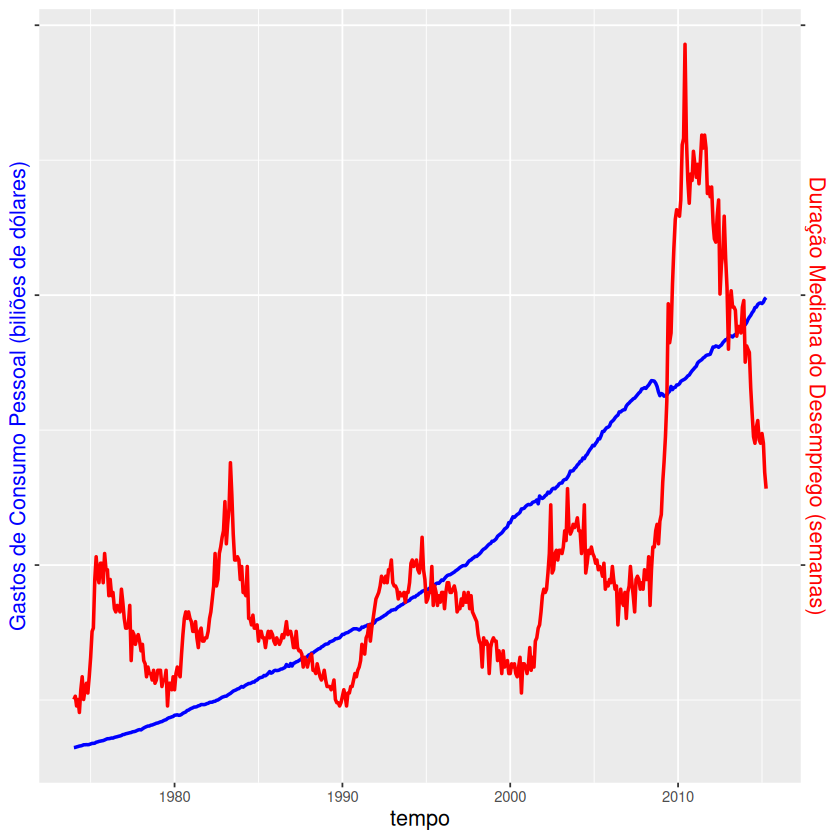

In [23]:
ggplot(new_data, aes(x=tempo)) +
    geom_line(aes(y=gcp), linewidth=1, color='blue') +
    geom_line(aes(y=ddesemp), linewidth=1, color='red') +
    scale_y_continuous(name = "Gastos de Consumo Pessoal (biliões de dólares)", sec.axis = sec_axis(~.,name="Duração Mediana do Desemprego (semanas)")) + 
    theme(
    axis.title.x = element_text(color = 'black', size=13),
    axis.text.y = element_blank(),
    axis.title.y = element_text(color = 'blue', size=13),
    axis.title.y.right = element_text(color = 'red', size=13),
    )